<a href="https://colab.research.google.com/github/SruthiChilukuri/advanced_deep_learning/blob/master/augumentation_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Implementing mixup, label smoothing, cutout and test time augmentation on CIFAR data**

Using fastai**

In [ ]:
!pip install fastai

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.CIFAR)

Split data into respective training and testing paths

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train')]

In [5]:
bs=64

In [6]:
train_path = path/'train'
test_path = path/'test'

In [7]:
print(train_path.ls)

<bound method <lambda> of PosixPath('/root/.fastai/data/cifar10/train')>


In [8]:
print(test_path.ls)

<bound method <lambda> of PosixPath('/root/.fastai/data/cifar10/test')>


###**ImageDataBunch.from_folder()** is used to create an object for the images stored in train and test folders.

In [9]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
frog,frog,frog,frog,frog
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
frog,frog,frog,frog,frog
Path: /root/.fastai/data/cifar10;

Test: None

samples from train batch; 

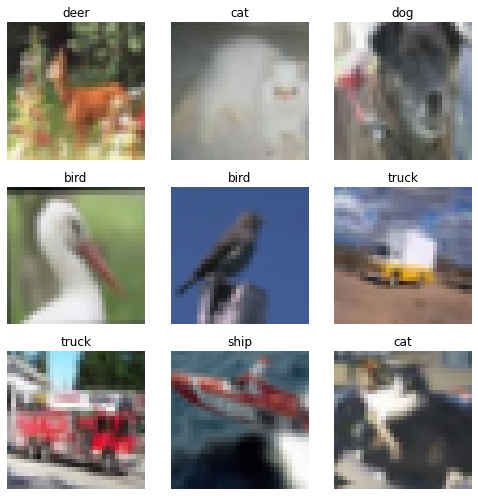

In [15]:
data.show_batch(rows=3, figsize=(7,7))

###Build a simple CNN model; training over a resnet architecture with 4 epochs

In [14]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.377065,1.154424,0.604000,08:36
1,0.966573,0.850617,0.703300,08:27
2,0.851478,0.753558,0.734700,08:29
3,0.795380,0.710220,0.750400,08:31


**Test time augumentation:** This is a data augmentation approach applied on test data (here "test") ; on each sample and then returns an ensemble result.

In [ ]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

###**Mixup augmentation:** In this approach, we will be feeding the model with 2 raw images which may or maynot be from the same class. Then a linear combination of them is calculated and returned. 

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy).mixup()
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

###**Label smoothening:** Applied when we have noisy labels

In [16]:
learn = create_cnn(data, models.resnet34, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.578350,1.426899,0.595700,08:37
1,1.259929,1.141992,0.719100,08:38
2,1.166404,1.084956,0.739800,08:48
3,1.128026,1.068402,0.745100,08:59


###**Cutout:** A regularization technique ; to decrease loss

In [17]:
tfms = [cutout(n_holes=(1,4), length=(8, 20), p=1.),cutout(n_holes=(1,4), length=(8,20), p=1.)]

In [18]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=tfms, num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
frog,frog,frog,frog,frog
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
frog,frog,frog,frog,frog
Path: /root/.fastai/data/cifar10;

Test: None

In [19]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.803281,1.607275,0.413400,08:17
1,1.392654,1.337593,0.513900,08:18
2,1.287474,1.210450,0.567500,08:21
3,1.233602,1.178771,0.579700,08:01
